IntSlider(value=25, description='X Pos', max=49)

IntSlider(value=25, description='Y Pos', max=49)

FloatSlider(value=1.0, description='Energy', max=5.0)

Button(description='Run Simulation', style=ButtonStyle())

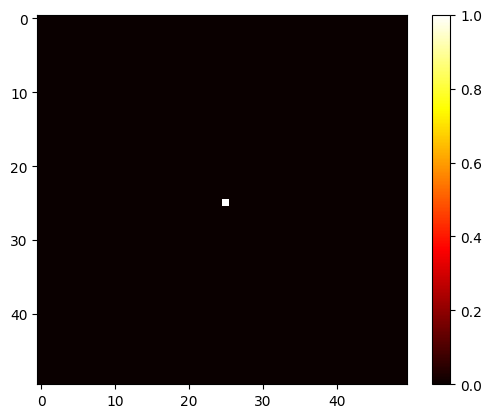

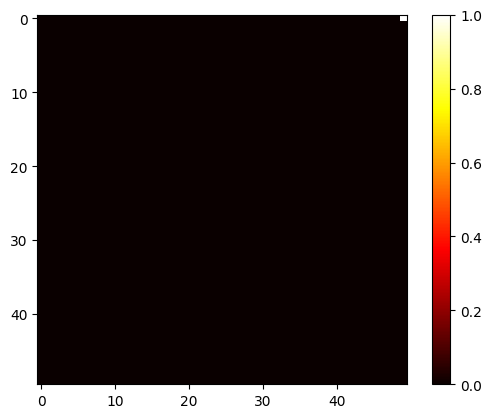

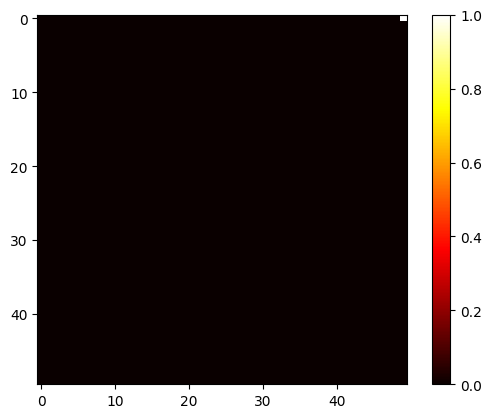

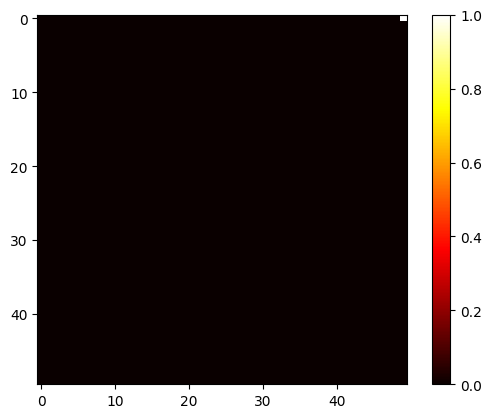

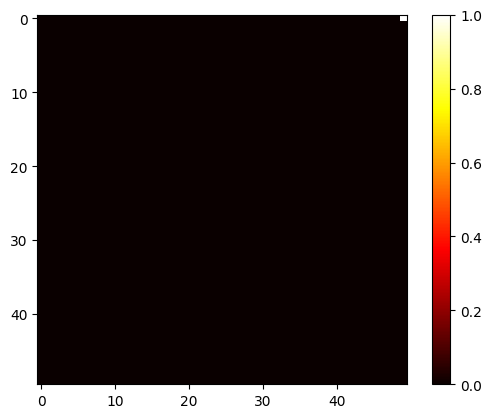

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import ipywidgets as widgets
from IPython.display import display

# Parameter grid
nx, ny = 50, 50
dx, dy = 1.0, 1.0
alpha = 0.01  # Difusivitas termal
dt = 0.1  # Time step

# Inisialisasi grid suhu
u = np.zeros((nx, ny))

# Fungsi untuk memperbarui suhu
def update_heat(u, source_x, source_y, source_energy):
    u_new = u.copy()
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            u_new[i, j] = u[i, j] + alpha * dt * (
                (u[i+1, j] - 2*u[i, j] + u[i-1, j]) / dx**2 +
                (u[i, j+1] - 2*u[i, j] + u[i, j-1]) / dy**2
            )
    u_new[source_x, source_y] += source_energy
    return u_new

# Fungsi untuk memperbarui visualisasi
def update_plot(frame, img, u, source_x, source_y, source_energy):
    global u_current
    u_current = update_heat(u_current, source_x, source_y, source_energy)
    img.set_array(u_current)
    return img,

# Fungsi untuk menjalankan simulasi
def run_simulation(source_x, source_y, source_energy):
    global u_current
    u_current = np.zeros((nx, ny))
    fig, ax = plt.subplots()
    img = ax.imshow(u_current, cmap='hot', interpolation='nearest', vmin=0, vmax=1)
    ani = FuncAnimation(fig, update_plot, fargs=(img, u_current, source_x, source_y, source_energy), frames=200, interval=50, blit=True)
    plt.colorbar(img)
    plt.show()

# Slider untuk mengatur posisi dan energi titik panas
source_x_slider = widgets.IntSlider(value=25, min=0, max=nx-1, description='X Pos')
source_y_slider = widgets.IntSlider(value=25, min=0, max=ny-1, description='Y Pos')
source_energy_slider = widgets.FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='Energy')

# Tombol untuk menjalankan simulasi
run_button = widgets.Button(description='Run Simulation')

# Fungsi untuk menangani klik tombol
def on_run_button_clicked(b):
    run_simulation(source_x_slider.value, source_y_slider.value, source_energy_slider.value)

run_button.on_click(on_run_button_clicked)

# Tampilkan slider dan tombol
display(source_x_slider, source_y_slider, source_energy_slider, run_button)

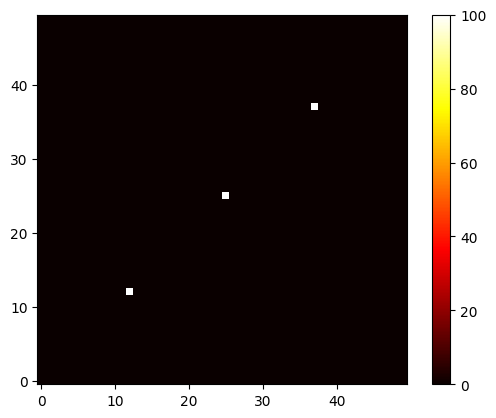

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')

# Parameter simulasi
nx, ny = 50, 50  # Jumlah grid dalam x dan y
alpha = 0.01  # Difusivitas termal
dx = dy = 0.01  # Resolusi spasial
dt = 0.0001  # Resolusi waktu
nt = 500  # Jumlah iterasi

# Kondisi awal (beberapa titik panas)
T = np.zeros((nx, ny))
T[nx//2, ny//2] = 1000  # Sumber panas di tengah
T[nx//4, ny//4] = 1000   # Sumber panas di kuadran kiri bawah
T[3*nx//4, 3*ny//4] = 1000  # Sumber panas di kuadran kanan atas

# Simulasi menggunakan metode beda hingga eksplisit
def update(T):
    T_new = T.copy()
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            T_new[i, j] = T[i, j] + alpha * dt / dx**2 * (
                T[i+1, j] + T[i-1, j] + T[i, j+1] + T[i, j-1] - 4*T[i, j]
            )
    return T_new

# Animasi hasil simulasi
fig, ax = plt.subplots()
cax = ax.imshow(T, cmap='hot', origin='lower', vmin=0, vmax=100)
fig.colorbar(cax)

def animate(frame):
    global T
    T = update(T)
    cax.set_data(T)
    return cax,

ani = animation.FuncAnimation(fig, animate, frames=nt, interval=30)
plt.show()
